Running Experiment A: Random Data... (Please wait)


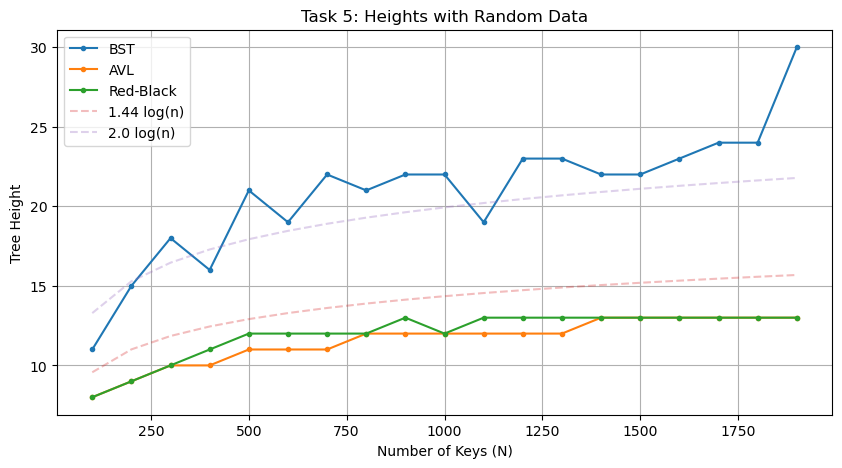

Running Experiment B: Sorted Data... (This might take a moment)


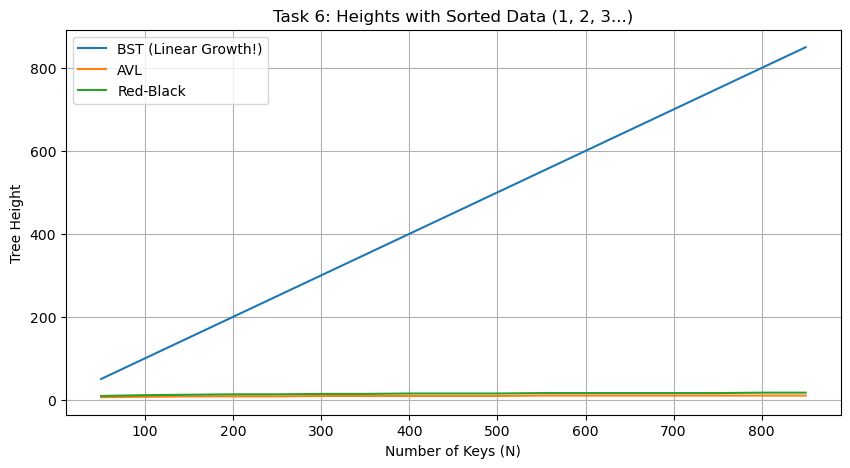

In [9]:
import random
import matplotlib.pyplot as plt
import math
import sys

# Increase recursion depth for the Sorted BST experiment
sys.setrecursionlimit(3000)

# ==========================================
# 1. BINARY SEARCH TREE (BST) - FULL VERSION
# ==========================================
class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None

class BST:
    def __init__(self):
        self.root = None

    # --- INSERT ---
    def insert(self, key):
        if self.root is None:
            self.root = Node(key)
        else:
            self._insert_recursive(self.root, key)

    def _insert_recursive(self, current_node, key):
        if key < current_node.key:
            if current_node.left is None:
                current_node.left = Node(key)
            else:
                self._insert_recursive(current_node.left, key)
        elif key > current_node.key:
            if current_node.right is None:
                current_node.right = Node(key)
            else:
                self._insert_recursive(current_node.right, key)

    # --- SEARCH ---
    def search(self, key):
        return self._search_recursive(self.root, key)

    def _search_recursive(self, node, key):
        if node is None or node.key == key:
            return node
        if key < node.key:
            return self._search_recursive(node.left, key)
        return self._search_recursive(node.right, key)

    # --- DELETE ---
    def delete(self, key):
        self.root = self._delete_recursive(self.root, key)

    def _delete_recursive(self, node, key):
        if node is None: return node
        
        if key < node.key:
            node.left = self._delete_recursive(node.left, key)
        elif key > node.key:
            node.right = self._delete_recursive(node.right, key)
        else:
            # Node with only one child or no child
            if node.left is None:
                return node.right
            elif node.right is None:
                return node.left
            
            # Node with two children: Get inorder successor (smallest in right subtree)
            temp = self._min_value_node(node.right)
            node.key = temp.key
            node.right = self._delete_recursive(node.right, temp.key)
        return node

    # --- MIN / MAX ---
    def find_min(self):
        node = self._min_value_node(self.root)
        return node.key if node else None

    def _min_value_node(self, node):
        current = node
        while current.left is not None:
            current = current.left
        return current

    def find_max(self):
        current = self.root
        if not current: return None
        while current.right:
            current = current.right
        return current.key

    # --- TRAVERSALS ---
    def inorder(self):
        res = []
        self._inorder_rec(self.root, res)
        return res
    def _inorder_rec(self, node, res):
        if node:
            self._inorder_rec(node.left, res)
            res.append(node.key)
            self._inorder_rec(node.right, res)

    def preorder(self):
        res = []
        self._preorder_rec(self.root, res)
        return res
    def _preorder_rec(self, node, res):
        if node:
            res.append(node.key)
            self._preorder_rec(node.left, res)
            self._preorder_rec(node.right, res)

    def postorder(self):
        res = []
        self._postorder_rec(self.root, res)
        return res
    def _postorder_rec(self, node, res):
        if node:
            self._postorder_rec(node.left, res)
            self._postorder_rec(node.right, res)
            res.append(node.key)

    def bfs(self): # Width traversal
        if not self.root: return []
        queue = [self.root]
        res = []
        while queue:
            node = queue.pop(0)
            res.append(node.key)
            if node.left: queue.append(node.left)
            if node.right: queue.append(node.right)
        return res

    # --- HEIGHT (Required for graphs) ---
    def get_height(self):
        return self._height_recursive(self.root)

    def _height_recursive(self, node):
        if node is None:
            return 0
        return 1 + max(self._height_recursive(node.left), self._height_recursive(node.right))

# ==========================================
# 2. AVL TREE
# ==========================================
class AVLNode:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1

class AVLTree:
    def __init__(self):
        self.root = None

    def get_height(self, node):
        if not node:
            return 0
        return node.height

    def get_balance(self, node):
        if not node:
            return 0
        return self.get_height(node.left) - self.get_height(node.right)

    def right_rotate(self, y):
        x = y.left
        T2 = x.right
        x.right = y
        y.left = T2
        y.height = 1 + max(self.get_height(y.left), self.get_height(y.right))
        x.height = 1 + max(self.get_height(x.left), self.get_height(x.right))
        return x

    def left_rotate(self, x):
        y = x.right
        T2 = y.left
        y.left = x
        x.right = T2
        x.height = 1 + max(self.get_height(x.left), self.get_height(x.right))
        y.height = 1 + max(self.get_height(y.left), self.get_height(y.right))
        return y

    def insert(self, key):
        self.root = self._insert_recursive(self.root, key)

    def _insert_recursive(self, node, key):
        if not node:
            return AVLNode(key)
        
        if key < node.key:
            node.left = self._insert_recursive(node.left, key)
        elif key > node.key:
            node.right = self._insert_recursive(node.right, key)
        else:
            return node 

        node.height = 1 + max(self.get_height(node.left), self.get_height(node.right))
        balance = self.get_balance(node)

        # Cases
        if balance > 1 and key < node.left.key:
            return self.right_rotate(node)
        if balance < -1 and key > node.right.key:
            return self.left_rotate(node)
        if balance > 1 and key > node.left.key:
            node.left = self.left_rotate(node.left)
            return self.right_rotate(node)
        if balance < -1 and key < node.right.key:
            node.right = self.right_rotate(node.right)
            return self.left_rotate(node)

        return node


# ==========================================
# 3. RED-BLACK TREE
# ==========================================
RED = True
BLACK = False

class RBNode:
    def __init__(self, key, color=RED, parent=None, left=None, right=None):
        self.key = key
        self.color = color
        self.left = left
        self.right = right
        self.parent = parent

class RedBlackTree:
    def __init__(self):
        self.TNULL = RBNode(0, color=BLACK)
        self.root = self.TNULL

    def insert(self, key):
        node = RBNode(key, color=RED, parent=None, left=self.TNULL, right=self.TNULL)
        parent = None
        curr = self.root

        while curr != self.TNULL:
            parent = curr
            if node.key < curr.key:
                curr = curr.left
            else:
                curr = curr.right
        
        node.parent = parent
        if parent is None:
            self.root = node
        elif node.key < parent.key:
            parent.left = node
        else:
            parent.right = node
        
        if node.parent is None:
            node.color = BLACK
            return
        if node.parent.parent is None:
            return

        self._fix_insert(node)

    def _fix_insert(self, k):
        while k.parent.color == RED:
            if k.parent == k.parent.parent.right:
                u = k.parent.parent.left 
                if u.color == RED:
                    u.color = BLACK
                    k.parent.color = BLACK
                    k.parent.parent.color = RED
                    k = k.parent.parent
                else:
                    if k == k.parent.left:
                        k = k.parent
                        self._right_rotate(k)
                    k.parent.color = BLACK
                    k.parent.parent.color = RED
                    self._left_rotate(k.parent.parent)
            else:
                u = k.parent.parent.right 
                if u.color == RED:
                    u.color = BLACK
                    k.parent.color = BLACK
                    k.parent.parent.color = RED
                    k = k.parent.parent
                else:
                    if k == k.parent.right:
                        k = k.parent
                        self._left_rotate(k)
                    k.parent.color = BLACK
                    k.parent.parent.color = RED
                    self._right_rotate(k.parent.parent)
            if k == self.root:
                break
        self.root.color = BLACK

    def _left_rotate(self, x):
        y = x.right
        x.right = y.left
        if y.left != self.TNULL:
            y.left.parent = x
        y.parent = x.parent
        if x.parent is None:
            self.root = y
        elif x == x.parent.left:
            x.parent.left = y
        else:
            x.parent.right = y
        y.left = x
        x.parent = y

    def _right_rotate(self, x):
        y = x.left
        x.left = y.right
        if y.right != self.TNULL:
            y.right.parent = x
        y.parent = x.parent
        if x.parent is None:
            self.root = y
        elif x == x.parent.right:
            x.parent.right = y
        else:
            x.parent.left = y
        y.right = x
        x.parent = y

    def get_height(self, node):
        if node == self.TNULL:
            return 0
        return 1 + max(self.get_height(node.left), self.get_height(node.right))


# ==========================================
# 4. EXPERIMENTS (Tasks 5 & 6)
# ==========================================
def run_final_experiments():
    # STEPS for N (number of keys)
    N_steps = list(range(100, 2000, 100))
    
    # ---------------------------------------------------------
    # EXPERIMENT A: RANDOM DATA (Task 5)
    # ---------------------------------------------------------
    print("Running Experiment A: Random Data... (Please wait)")
    bst_h, avl_h, rb_h = [], [], []
    
    for n in N_steps:
        keys = random.sample(range(1, n * 10), n)
        
        # BST
        t1 = BST()
        for k in keys: t1.insert(k)
        bst_h.append(t1.get_height())
        
        # AVL
        t2 = AVLTree()
        for k in keys: t2.insert(k)
        avl_h.append(t2.get_height(t2.root))
        
        # RB
        t3 = RedBlackTree()
        for k in keys: t3.insert(k)
        rb_h.append(t3.get_height(t3.root))

    # Plot 1
    plt.figure(figsize=(10, 5))
    plt.plot(N_steps, bst_h, label='BST', marker='.')
    plt.plot(N_steps, avl_h, label='AVL', marker='.')
    plt.plot(N_steps, rb_h, label='Red-Black', marker='.')
    
    # Theoretical Bound lines (Optional but good for report)
    # 1.44 log2(n) is rough upper bound for AVL
    # 2 log2(n) is rough upper bound for RB
    theo_avl = [1.44 * math.log2(x) for x in N_steps]
    theo_rb = [2 * math.log2(x) for x in N_steps]
    
    plt.plot(N_steps, theo_avl, '--', label='1.44 log(n)', alpha=0.3)
    plt.plot(N_steps, theo_rb, '--', label='2.0 log(n)', alpha=0.3)
    
    plt.title("Task 5: Heights with Random Data")
    plt.xlabel("Number of Keys (N)")
    plt.ylabel("Tree Height")
    plt.legend()
    plt.grid(True)
    plt.show()

    # ---------------------------------------------------------
    # EXPERIMENT B: SORTED DATA (Task 6)
    # ---------------------------------------------------------
    print("Running Experiment B: Sorted Data... (This might take a moment)")
    bst_h, avl_h, rb_h = [], [], []
    
    # We use fewer nodes because BST crashes on deep recursion
    N_steps_sorted = list(range(50, 900, 50)) 

    for n in N_steps_sorted:
        keys = list(range(1, n + 1)) # Sorted: 1, 2, 3...
        
        # BST
        t1 = BST()
        for k in keys: t1.insert(k)
        bst_h.append(t1.get_height())
        
        # AVL
        t2 = AVLTree()
        for k in keys: t2.insert(k)
        avl_h.append(t2.get_height(t2.root))
        
        # RB
        t3 = RedBlackTree()
        for k in keys: t3.insert(k)
        rb_h.append(t3.get_height(t3.root))

    # Plot 2
    plt.figure(figsize=(10, 5))
    plt.plot(N_steps_sorted, bst_h, label='BST (Linear Growth!)')
    plt.plot(N_steps_sorted, avl_h, label='AVL')
    plt.plot(N_steps_sorted, rb_h, label='Red-Black')
    
    plt.title("Task 6: Heights with Sorted Data (1, 2, 3...)")
    plt.xlabel("Number of Keys (N)")
    plt.ylabel("Tree Height")
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    run_final_experiments()